<a href="https://colab.research.google.com/github/pkky/Projekty/blob/main/ProjektS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# biblioteka numeryczna
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt

# pomar czasu
import time

# skumulowana suma tablicy
from itertools import accumulate

Problem TSP

In [2]:
n=50 # dla algorytmu mrówkowego

cities = np.array([[random.random(),random.random()] for i in range(n)]) # lista współrzędnych miast

In [3]:
# odległość euklidesowa
def dist(i, j):
  return np.sqrt((cities[i,0]-cities[j,0])**2 + (cities[i,1]-cities[j,1])**2)

In [4]:
# długość drogi
def len_path(path):
    return sum([dist(path[i],path[i+1]) for i in range(n)])

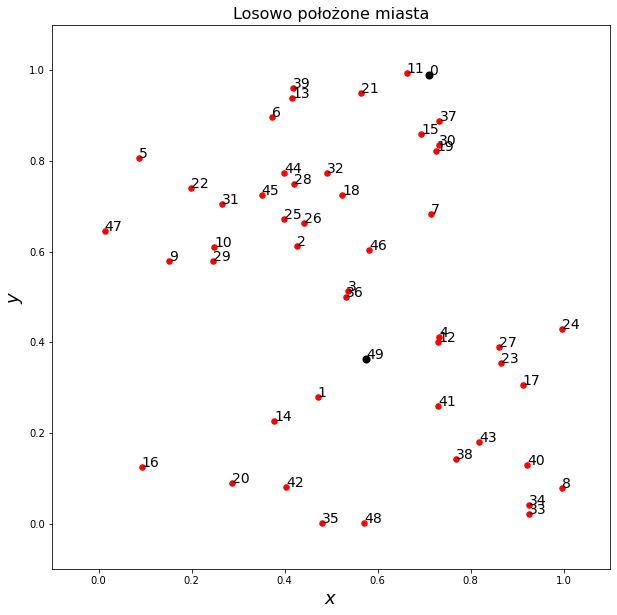

In [5]:
plo_cities=plt.figure(figsize=(10,10))
plt.title("Losowo położone miasta",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(cities[:,0],cities[:,1],c='red', s=30)
plt.scatter(cities[0,0],cities[0,1],c='black',s=50)
plt.scatter(cities[n-1,0],cities[n-1,1],c='black',s=50)

for i in range(n):
    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [7]:
# losowa droga - np.random.permutation 
# dodanie miasta 0 na początku i na końcu
sequence=np.insert(np.append(np.random.permutation(n-1)+1,0),0,0) # sekwencja miast z losową permutacją

In [8]:
# powyżej była lista miast, teraz lista odpowiadających im współrzędnych
tour=np.array([cities[i] for i in sequence])
# porównaj wizualnie z powyższym rysunkiem

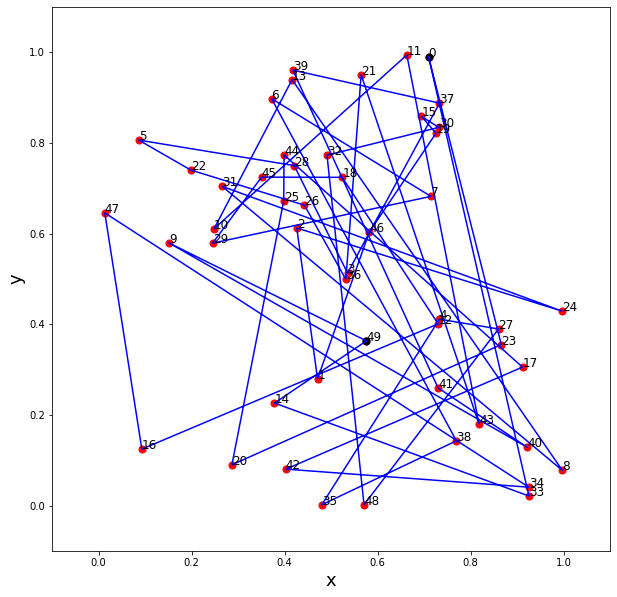

In [10]:
plt.figure(figsize=(10,10))

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

plt.plot(tour[:,0],tour[:,1],c='blue')

plt.scatter(cities[:,0],cities[:,1],c='red',s=50)
plt.scatter(cities[0,0],cities[0,1],c='black',s=50)
plt.scatter(cities[n-1,0],cities[n-1,1],c='black',s=50)

for i in range(n):
    plt.annotate(i,(cities[i,0],cities[i,1]),fontsize=12)

plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18);

In [11]:
sequence[0], sequence[1]

(0, 33)

In [12]:
dist(sequence[0],sequence[1])
# por. z powyższym rysunkiem

0.9927193199681285

In [13]:
lenpa=np.round(len_path(sequence),3) # zaokrąglenie
lenpa

24.549

ACO dla TSP

In [14]:
# tablica odległości między miastami
dis_tab=np.array([[dist(i,j) for i in range(n)] for j in range(n)])
np.round(dis_tab,2) # zaokrąglenie dla przejrzystości wydruku

array([[0.  , 0.75, 0.47, ..., 0.78, 1.  , 0.64],
       [0.75, 0.  , 0.34, ..., 0.59, 0.3 , 0.13],
       [0.47, 0.34, 0.  , ..., 0.41, 0.63, 0.29],
       ...,
       [0.78, 0.59, 0.41, ..., 0.  , 0.85, 0.63],
       [1.  , 0.3 , 0.63, ..., 0.85, 0.  , 0.36],
       [0.64, 0.13, 0.29, ..., 0.63, 0.36, 0.  ]])

In [15]:
# początkowa tablica feromonów - na razie wszędzie tyle samo!
fero=np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n)
fero

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [16]:
# parametry modelu dot. prawdopodobieństwa wyboru drogi przez mrówkę

alpha = 1.15;
beta = 1;

h = 0.03; # szybkość uaktualniania śladów feromonowych
# po kolejnym etapie algorytmu feromony_nowe = (1-h) feromony_stare + h feromony_złożone

popsize = 10; # liczba mrówek "na trasie" w kolejnym etapie algorytmu

sc = n/popsize; # kontroluje, ile feromonu jest zostawiane = liczba miast/liczba mrówek

# odkładana przez mrówkę ilość feromonu to sc/długość odcinka

In [17]:
# Zwraca (losowo) miasto do odwiedzenia z listy miast togo, jeśli mrówka jest w mieście i.
# Stosujemu oczywiście naszą maszynke ind_prob.

def ac_next(i, togo):
    p =np.array([fero[i, j]**alpha/dis_tab[i, j]**beta for j in togo]) # wagi
    su=np.sum(p) # suma wag
    p=p/su # prawdopodobieństwa (wagi znormalizowane do 1)
    return togo[ind_prob(p)]

In [18]:
to_v=[i for i in range(1,n)] # miasta do odwiedzenia (na razie wszystkie)
to_v

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [19]:
# zebranie powyższych instrukcji w jedną funkcję
def ind_prob(tab_p):
    cum_p=np.array(list(accumulate(tab_p)))
    return np.sum(np.heaviside(random.random()-cum_p,0)).astype(int)

In [20]:
# tablica prawdopodobieństw
tab_p=np.array([0.5, 0.2, 0.1, 0.2])
cum_p=np.array(list(accumulate(tab_p)))
np.round(cum_p,2)

array([0.5, 0.7, 0.8, 1. ])

In [21]:
ind_prob(tab_p)

3

In [22]:
ac_next(0,to_v) # losowo wybrane kolejne miasto, jeśli mrówka jest w mieście 0

26

In [23]:
tt=[ac_next(0,to_v) for _ in range(10000)] # 10000 wyborów (na próbę)

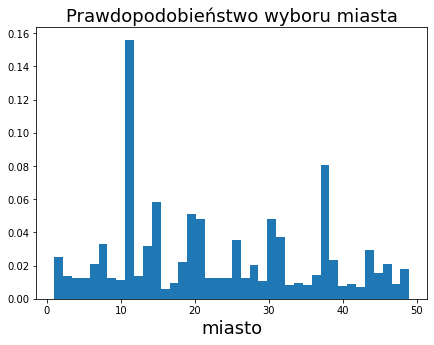

In [24]:
plt.figure(figsize=(7,5))
wei = np.ones_like(tt)/len(tt)
plt.hist(tt, weights=wei,bins=40)
plt.title('Prawdopodobieństwo wyboru miasta',fontsize=18);
#plt.annotate("miasto poczatkowe: 0", (1,.25),fontsize=14)
plt.xlabel('miasto',fontsize=18);

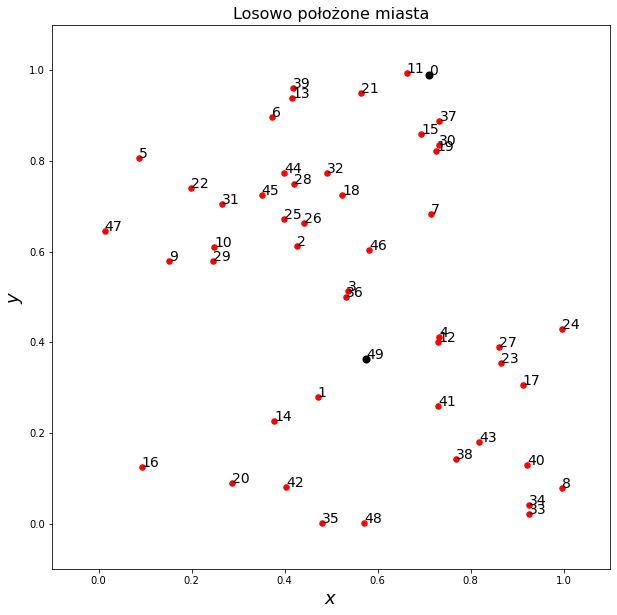

In [25]:
plo_cities

In [26]:
# jeden etap algorytmu
# liczba pop mrówek wyrusza w trasę, każda z losowo wybranego miasta

def ac_one(pop):
    lm=10**10 # coś dużego - aktualna długość najlepszej trasy
    global fero2 # macierz "nowych" feromonów, które zostawią mrówki
    fero2=np.array([[0. for _ in range(n)] for _ in range(n)]) # inicjalizacja jako 0
    for mr in range(pop): # petla po mrówkach
        print()
        print("mrówka nr ",mr)
        print()
        pos=random.randint(0,n-1) # początkowe losowe miasto dla danej mrówki
        route=[pos] # dodanie miasta początkowego do trasy
        print(pos)
        to_v=[i for i in range(0,pos)]+[i for i in range(pos+1,n)] # miasta do odwiedzenia
        print(to_v)
        
        for _ in range(n-1): # pętla po liczbie miast do odwiedzenia
            pos=ac_next(pos,to_v) # nastepne miasto, wybrane wg prawdopodobieństwa ...
            route.append(pos) # dodanie tego miasta do trasy
            to_v.remove(pos)  # usunięcie z listy miast do odwiedzenia
            print(pos)
            print(to_v)
            
        route.append(route[0]) # dodanie na końcu trasy początkowego miasta 
          # (mrówka wraca do punktu startowego)    
        print(route)
        
        lr=len_path(route) # długość trasy
        print("obecna długość",lr)
        if lr<lm: # jeśli trasa jest krótsza od aktualnie najlepszej ... 
            lm=lr # ... to uaktualnij długość najkrótszej trasy ...
            r_opt=route # ... i zapamietaj ją jako r_opt
        print("najkrótsza długość",lm)    
            
    for i in range(n): # pozostawione feromony na każdym odcinku trasy
        fero2[r_opt[i],r_opt[i+1]]=fero2[r_opt[i],r_opt[i+1]]+sc/lm # w przód
        fero2[r_opt[i+1],r_opt[i]]=fero2[r_opt[i+1],r_opt[i]]+sc/lm # wspak
            # symetryzujemy dla symetrycznego problemu TSP - w ogólności nie musi tak być            
          
    return lm, r_opt # zwróć długość najkrótszej trasy i trasę
    

In [27]:
opt=ac_one(3) # działanie powyższego algorytmu dla 3 mrówek


mrówka nr  0

20
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
15
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
11
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
21
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
14
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
29
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 17, 18, 19, 22, 23, 24, 2

In [28]:
np.round(fero2,2) # złożone feromony 

array([[0.  , 0.29, 0.  , ..., 0.29, 0.  , 0.  ],
       [0.29, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.29, 0.  ],
       ...,
       [0.29, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.29, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [29]:
opt # najkrótsza znaleziona trasa

(17.11915675491317,
 [20,
  15,
  11,
  21,
  14,
  29,
  9,
  26,
  10,
  45,
  44,
  36,
  3,
  6,
  37,
  19,
  30,
  5,
  2,
  48,
  17,
  7,
  38,
  28,
  42,
  35,
  40,
  25,
  22,
  31,
  13,
  39,
  4,
  12,
  24,
  27,
  49,
  41,
  34,
  33,
  8,
  23,
  46,
  18,
  32,
  47,
  0,
  1,
  16,
  43,
  20])

In [30]:
# jeszcze raz parametry

alpha = 1.15;
beta = 1;
h = 0.03;
popsize = 10;
sc = n/popsize;

In [31]:
ac_one(2)


mrówka nr  0

20
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
1
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
10
[0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
33
[0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
41
[0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
39
[0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 2

(18.063069836475837,
 [10,
  38,
  43,
  27,
  23,
  16,
  31,
  44,
  45,
  30,
  19,
  1,
  35,
  40,
  8,
  4,
  12,
  42,
  48,
  36,
  37,
  25,
  32,
  21,
  15,
  11,
  24,
  5,
  0,
  17,
  46,
  2,
  3,
  7,
  28,
  39,
  13,
  18,
  6,
  14,
  49,
  41,
  29,
  34,
  33,
  47,
  22,
  20,
  26,
  9,
  10])

In [32]:
# cały algorytm mrówkowy dla TSP (10 linijek + 20 linijek kodu ac_one)

iter=10000
# iter=10000 # liczba iteracji dla n=50

min_l=10**10 # coś dużego, początkowa długość najlepszej drogi (numeryczna nieskonczoność)
fero=np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n) 
     # początkowa macierz feromonów

for k in range(iter):   # pętla po iteacjach
    opt=ac_one(popsize) # jeden "zespół" popsize mrówek na trasie

    if opt[0]<min_l: # jeśli znaleziona droga krótsza, uaktualnij ...
        min_l=opt[0] # ... jej długość ...
        best_route=opt[1] # ... i trasę
        print('zmiana w kroku ',k) # wydruk, by było widać, że optimum się zmienia
# ważne!         
    fero=(1-h)*fero+h*fero2 # uaktualnienie macierzy feromonów
        # parowanie "starego" feromonu, dodanie nowego

print()
print(min_l, best_route) # najlepsza trasa
print()
    
print(np.round(fero,2)) # końcowa macierz feromonów
    

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[33, 34]
33
[34]
34
[]
[8, 40, 17, 23, 27, 24, 4, 12, 49, 36, 3, 46, 7, 19, 30, 15, 37, 0, 11, 21, 39, 13, 6, 44, 28, 32, 18, 26, 2, 25, 45, 31, 22, 5, 47, 9, 10, 29, 1, 14, 16, 20, 42, 35, 48, 41, 38, 43, 33, 34, 8]
obecna długość 5.516656168844178
najkrótsza długość 5.516656168844178

mrówka nr  3

2
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
26
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
18
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
32
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21

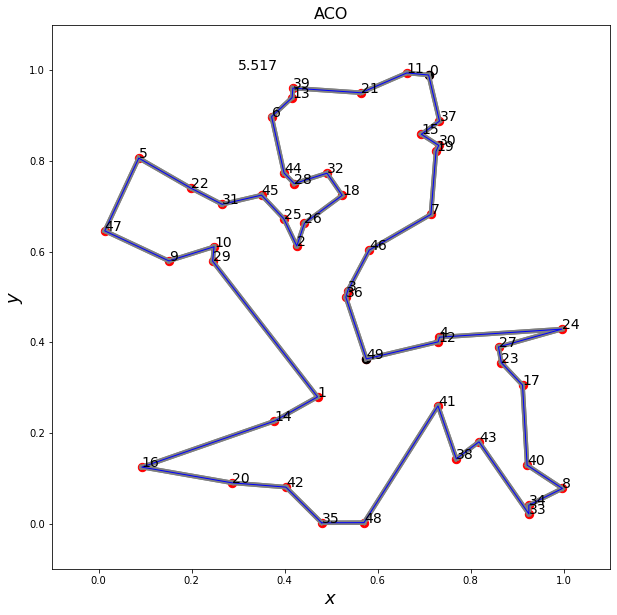

In [37]:
plo_mro=plt.figure(figsize=(10,10))
plt.title("ACO",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

# grafika ilustrujaca gęstość feromonów poprzez grubość linii
for i in range(n):
    for j in range(n):
        plt.plot([cities[i,0],cities[j,0]],[cities[i,1],cities[j,1]],
                 c="gray",linewidth=5*fero[i,j]) # grubosć linii prop. do gestości feromonów

bb=np.array([cities[i] for i in best_route])
plt.plot(bb[:,0],bb[:,1],c='blue',linewidth=1)

plt.scatter(cities[:,0],cities[:,1],c='red', s=70)
plt.scatter(cities[0,0],cities[0,1],c='black',s=70)
plt.scatter(cities[n-1,0],cities[n-1,1],c='black',s=70)

for i in range(n):
    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

mm=np.round(min_l,3)
plt.annotate(mm, (.3,1),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);